Link to Google nontebook: https://colab.research.google.com/drive/1sRucWRYNdS1NR1sqQM3fPusl8gf12xa3

In [ ]:
pip install -i https://test.pypi.org/simple/ icalgosocdemo==0.0.10

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
from icalgodemo.strategy import Strategy
from collections import deque 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Week 3 Volatility and Kurtosis in financial time series




### Volatility of S&P 500

In [ ]:
class BuyandHoldStrategy(Strategy):

    def before_trades(self):
      self.counter = 0
      return None 
    
    def ondata(self,bid,ask):
      self.counter += 1
      if self.counter>=200:
        return 1
      else:
        return 0


In [ ]:
strat = BuyandHoldStrategy(datasets='SPY')
strat.train()

Running Pedlar Demo for single asset. Dataset SPY


In [ ]:
strat.download_train(dataset='SPY')

Training Data Downloaded from dataset SPY


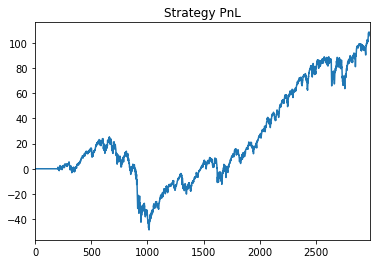

In [ ]:
strat.plot_pnl()

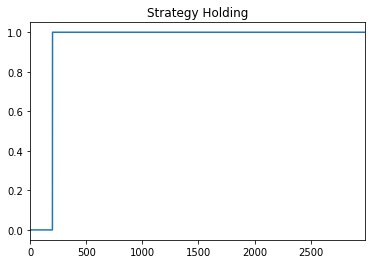

In [ ]:
strat.plot_holding()

In [ ]:
sharpe = strat.pnl[-1] / pd.Series(strat.pnl).std()
sharpe

2.8167262054144753

Buy and hold with strategy volatility scaling

In [ ]:
class BuyandHoldStrategy(Strategy):

    def before_trades(self):
      self.bidhist = deque(maxlen=200)
      self.askhist = deque(maxlen=200)
      self.midhist = deque(maxlen=200)
      return None 
    
    def ondata(self,bid,ask):
      self.bidhist.append(bid)
      self.askhist.append(ask)
      mid = (ask+bid)/2
      self.midhist.append(mid)
      if len(self.midhist) == self.midhist.maxlen:
        volatility = pd.Series(self.midhist).std()
        return 20/np.square(volatility)
      else:
        return 0

In [ ]:
strat = BuyandHoldStrategy(datasets='SPY')
strat.train()

Running Pedlar Demo for single asset. Dataset SPY


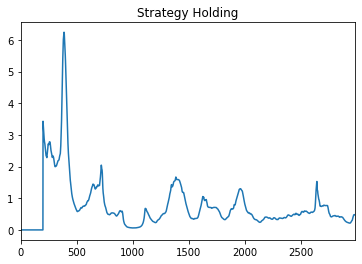

In [ ]:
strat.plot_holding()

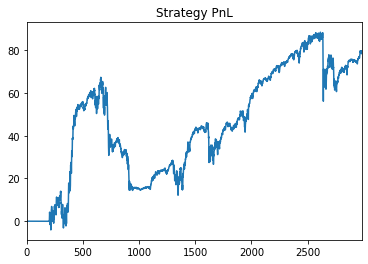

In [ ]:
strat.plot_pnl()

In [ ]:
sharpe = strat.pnl[-1] / pd.Series(strat.pnl).std()
sharpe

3.028962652964719

Volatility scaling improves the performance of a buy and hold strategy. Most trading strategy would focus on learning the direction of the movement of an asset and then apply volatility scaling to determine the portfolio exposure.

Question: How would you improve the trading strategy by using historical volatility as a signal? 

Advanced question: VIX is a measure of implied volatility, the market expectation of the volatility of S&P500 in the coming months derived from options. How would you use VIX as a trading signal for S&P 500 and its futures

### Skewness and Kurtosis in S&P500

In [ ]:
strat.download_train(dataset='SPY')

Training Data Downloaded from dataset SPY


In [ ]:
train_data = pd.read_csv('Train_SPY.csv',index_col=0)

In [ ]:
train_data['Mid'] = (train_data['Bid'] + train_data['Ask'])/2
train_data['Return'] = np.log(train_data['Mid']) - np.log(train_data['Mid'].shift(1)) 
train_data.dropna(inplace=True)

In [ ]:
from scipy.stats import skew,kurtosis

In [ ]:
SPY_skew = skew(train_data['Return'])
SPY_skew

-0.10720519248610244

In [ ]:
SPY_kurt = kurtosis(train_data['Return'])
SPY_kurt

14.328567618169238

Histogram of log returns

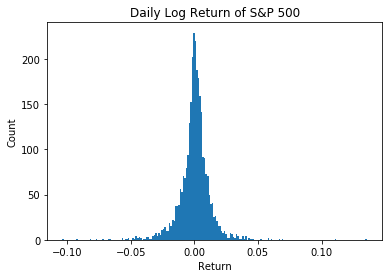

In [ ]:
plt.hist(train_data['Return'],bins=200)
plt.xlabel('Return')
plt.ylabel('Count')
plt.title('Daily Log Return of S&P 500')
plt.show()

Question: The kurtosis of a normal distribution is 3 and for the daily log returns we have a kurtosis of 14, what are the implications in modelling?

Question: t-distribution has been suggested to model log returns. Find the parameters of t-distribution by maximal likelihood estimation